++***********+++# Домашнее задание

Математический анализ
69 баллов

**Задача 1** (14 баллов)

Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

Распишите подробное решение.

Импорт необходимых библиотек

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

1. Находим производные.
2. Приравниваем производные к нулю для нахождения экстремумов.

In [ ]:
import sympy
from sympy import diff

# Определяем x,y,z
x, y, z = sympy.symbols('x y z')

# Определяем выражение
expr = 2*x**3 + 2*x*y + 2*x*z + y**2 + z**2 + 2*y - 8

# Находим производную по x,y,z
derivative = expr.diff(x)
derivative_2 = expr.diff(y)
derivative_3 = expr.diff(z)


# Вывод результата на экран
print("Производная выражения по x:", derivative)
print("Производная выражения по y:", derivative_2)
print("Производная выражения по z:", derivative_3)

partial_x = diff(expr, x)
partial_y = diff(expr, y)
partial_z = diff(expr, z)


Производная выражения по x: 6*x**2 + 2*y + 2*z
Производная выражения по y: 2*x + 2*y + 2
Производная выражения по z: 2*x + 2*z


3. Решение системы уравнений
Выражаем z и y через x.
z = -x
y = -x - 1
6x² - 4x - 2 = 0
Таким образом, находим значения x
x1, x2 = 1, -1/3


In [105]:
critical_points = sp.solve((partial_x, partial_y, partial_z), (x, y, z))
print("Критические точки:", critical_points)

Критические точки: [(-1/3, -2/3, 1/3), (1, -2, -1)]


In [ ]:
# Для проверки типов экстремумов используем гессиан
hessian_matrix = sympy.Matrix([[diff(partial_x, var) for var in (x, y, z)],
                                [diff(partial_y, var) for var in (x, y, z)],
                                [diff(partial_z, var) for var in (x, y, z)]])

# Печатаем матрицу Гессе
print("Матрица Гессе:")
sympy.pprint(hessian_matrix)

Матрица Гессе:
⎡12⋅x  2  2⎤
⎢          ⎥
⎢ 2    2  0⎥
⎢          ⎥
⎣ 2    0  2⎦


Чтобы понять какие точки являются седловыми, какие экстремумами проверим их.

In [20]:
# Проверка типа экстремума в критических точках
for point in critical_points:
    hessian_at_point = hessian_matrix.subs({x: point[0], y: point[1], z: point[2]})
    eigenvalues = hessian_at_point.eigenvals()
    print(f"Критическая точка {point}: собственные значения Гессиана {eigenvalues}")

    # Проверка знаков собственных значений
    if all(val > 0 for val in eigenvalues):
        print("Минимум")
    elif all(val < 0 for val in eigenvalues):
        print("Максимум")
    else:
        print("Седловая точка")

Критическая точка (-1/3, -2/3, 1/3): собственные значения Гессиана {2: 1, -sqrt(17) - 1: 1, -1 + sqrt(17): 1}
Седловая точка
Критическая точка (1, -2, -1): собственные значения Гессиана {2: 1, 7 - sqrt(33): 1, sqrt(33) + 7: 1}
Минимум


Вычисление частных производных: 
Производная выражения по x: 6*x**2 + 2*y + 2*z
Производная выражения по y: 2*x + 2*y + 2
Производная выражения по z: 2*x + 2*z

Составление системы уравнений:
6*x**2 + 2*y + 2*z=0
2*x + 2*y + 2=0
2*x + 2*z=0

Решение системы уравнений:
[(-1/3, -2/3, 1/3), (1, -2, -1)]

Анализ второго порядка:
(-1/3, -2/3, 1/3) - седловая
(1, -2, -1)    - минимум

Вывод
Ниже


**Вывод. Точка (-1/3, -2/3, 1/3) является седловой. Тогда как точка (1, -2, -1) является экстремумом (минимумом) - данной области матрица Гессе положительно определена, все собственне значения положительны.**

**Задача 2** (25 баллов)

Найдите условные экстремумы функции:

$$
f(x, y)=4 x+8 y, y^2-2 x y+5=0
$$

Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

* 1. Функция  Лагранжа имеет вид L(x,y,λ) = 4x + 8y + λ(y² - 2xy + 5)

* 2.Приравнять к нулю частные производные ∂L/∂x = 4 - 2λy = 0 (1) ;  ∂L/∂y = 8 + 2λy - 2λx = 0 (2);  ∂L/∂λ = y² - 2xy + 5 = 0 (3)

* 3.(1): 4 - 2λy = 0 λy = 2 y = 2/λ

* 4: (2): 
        8 + 2λy - 2λx = 0 
        8 + 2λ(2/λ) - 2λx = 0 
        8 + 4 - 2λx = 0 
        2λx = 12 
        x = 6/λ

* 5: Подставляем x и y в уравнение связи: (2/λ)² - 2(6/λ)(2/λ) + 5 = 0 4/λ² - 24/λ² + 5 = 0 -20/λ² + 5 = 0 -20 + 5λ² = 0 λ² = 4 λ = ±2

* 6: Находим координаты точек экстремума: При λ = 2: x = 6/2 = 3 y = 2/2 = 1

При λ = -2: x = 6/(-2) = -3 y = 2/(-2) = -1

* 7: Вычисляем значения функции в найденных точках: f(3,1) = 4(3) + 8(1) = 12 + 8 = 20 f(-3,-1) = 4(-3) + 8(-1) = -12 - 8 = -20

Ответ: Условные экстремумы функции достигаются в точках:

Максимум в точке (3,1) со значением 20 Минимум в точке (-3,-1) со значением -20

In [3]:
x, y, lambda_ = sp.symbols('x y lambda')
f = 4*x + 8*y
g = y**2 - 2*x*y + 5

# Функция Лагранжа имеет вид
L = f + lambda_ * g

# Находим производные
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlambda = sp.diff(L, lambda_)

# Система уравнений имеет решение
extr = sp.solve([dL_dx, dL_dy, g], (x, y, lambda_))

# Посмотрим на получившиеся точки
print(extr)

[(-3, -1, -2), (3, 1, 2)]


Составление функции множителей Лагранжа - L(x,y,λ) = 4x + 8y + λ(y² - 2xy + 5)
Вычисление частных производных и составление системы уравнений 
        ∂L/∂x = 4 - 2λy = 0 (1) ;  ∂L/∂y = 8 + 2λy - 2λx = 0 (2);  ∂L/∂λ = y² - 2xy + 5 = 0 (3)
Решение системы вручную   
        λ = -2  x=-3,y=-1) --------решение выше
        λ = 2: x = 3 y = 1
Реализация вычислений с помощью Python
       [(-3, -1, -2), (3, 1, 2)]
Сравнение результатов и вывод 
       ниже

**Итак, наши точки, найденные вручную и Симпаем совпадают.Условные экстремумы функции (-3,-1) и (3,1).**

**Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

## Знакомство с данными

In [85]:
import pandas as pd
data = pd.read_csv("C:\Data_sets\Student_Performance.txt")

In [86]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [78]:
# Основные характеристики
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [87]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

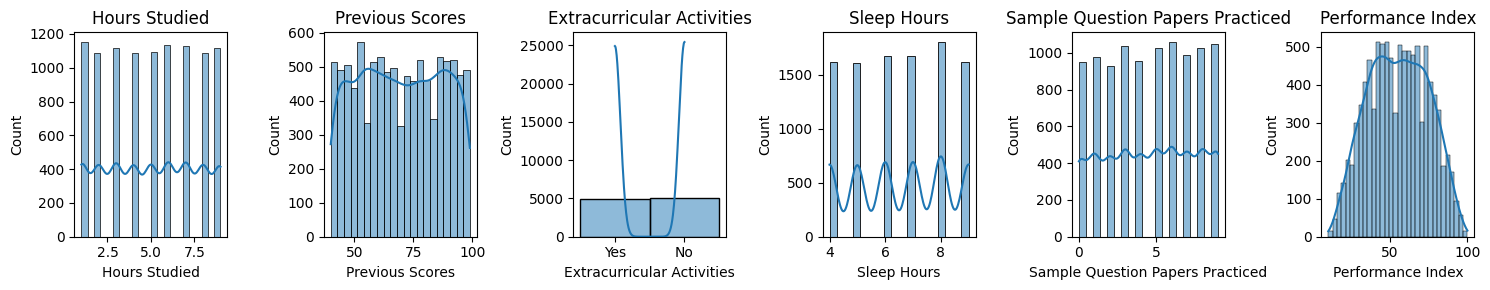

In [ ]:
## Визуализируем, какие наши данные на вид
plt.figure(figsize=(15, 3))
for i, column in enumerate(data.columns):
    plt.subplot(1, 6, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


## Формализация задачи линейной регрессии

## Предобработка данных  и стандартизация

В общем данные распределены нормально кроме Extracurricular Activities. Удалила его. Для стандартизации данных использован StandardScaler()

In [80]:
data=data.drop(columns='Extracurricular Activities')

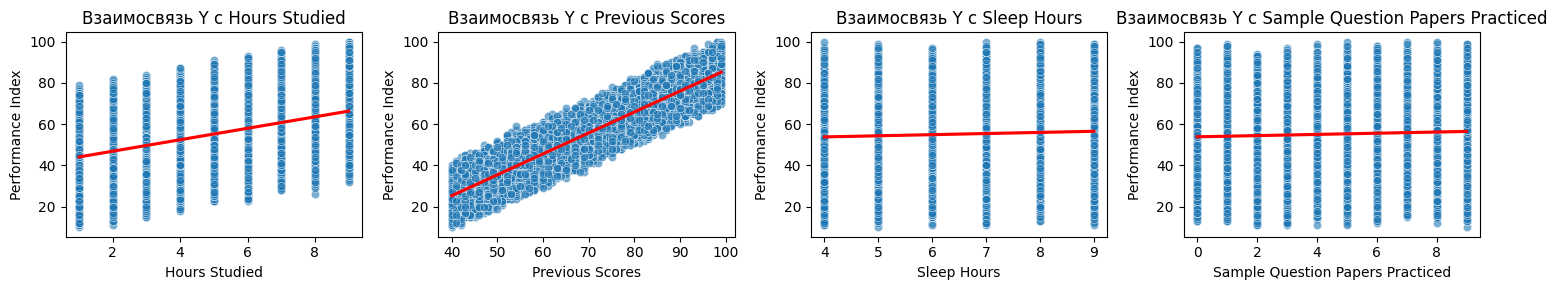

In [102]:
X = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = data['Performance Index'].values.reshape(-1, 1)

n = len(y.flatten())
plt.figure(figsize=(15, 3))
independent_vars = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for i, var in enumerate(independent_vars):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x=data[var], y=data['Performance Index'], alpha=0.6)  # Построение диаграммы рассеяния
    sns.regplot(x=data[var], y=data['Performance Index'], scatter=False, color='red')  # Построение линии регрессии
    plt.title(f'Взаимосвязь Y с {var}')
    plt.xlabel(var)
    plt.ylabel('Performance Index')
plt.tight_layout()
plt.show()

**Стандартизация и добавление столбца для свободного члена**

In [ ]:
# Стандартизуем наши данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Добавление столбца единиц для свободного члена
X = np.append(np.ones((n, 1)), X, axis=1)

## Реализация функции потерь , реализация градиентного спуска

In [ ]:
par = np.zeros((X.shape[1], 1))

# 2. Реализация функции ошибок (потерь)
def cost_function(X, y , par):
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    cost = 1/(n)*np.sum(error)
    return cost

# 3. Реализация градиентного спуска
def grad_d(X, y, par, alpha, iterations, eps=0.001):
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        der = np.dot (X.transpose(), (y_pred - y))
        par -= alpha * 1 / n * der
        costs.append(cost_function(X, y, par))
        # Добавили критерий остановки в алгоритм - длина вектора градиента меньше либо равна eps
        # Это случается, когда все компоненты вектора градиента близки к eps (почти 0)
        if np.linalg.norm(der) <= eps:
            # В случае выполнения критерия остановки алгоритм завершает работу
            break
    return par, costs

par_opt, costs_opt = grad_d(X, y, par, 0.00005, 500000)
print(par.round(4))

# Расчет МАП
def MAPE_func(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Вывод по итоговой модели
y_pred_opt = np.dot(X, par_opt)
mape_opt = MAPE_func(y, y_pred_opt)
r2_opt = r2_score(y, y_pred_opt)

print(f'MAPE: {mape_opt.round(4)}%')
print(f'R2: {np.round(r2_opt*100, 4)}%')





[[55.2248]
 [ 7.388 ]
 [17.6646]
 [ 0.8078]
 [ 0.5597]]
MAPE: 3.4962%
R2: 98.8498%


## Анализ итоговой модели и коэффициентов линейной регрессии и Предсказание и оценка точности модели

**Самое большое влияние на целевую переменную оказывают оценки за предыдущие экзамены, а также часы учебы.Количество пробных экзаменационных работ вносит наименьший вклад.МАП  3,5 % - точность модели высокая. Хорошим считается знпчение МАП менее 5%. Высокое значение R² указывает на то, что модель хорошо подстраивается под данные и может быть эффективной для прогнозирования**

## Теперь реализуем решение SKLEARN ##

Ручной расчет VS sklern
           Params Градиентный спуск Использование sklearn
0  Свободный член           55.2248               55.2248
1             К_1             7.388                 7.388
2             K_2           17.6646               17.6646
3             K_3            0.8078                0.8078
4             К_4            0.5597                0.5597
5              R²           98.8498               98.8498
6            MAPE            3.4962                3.4962


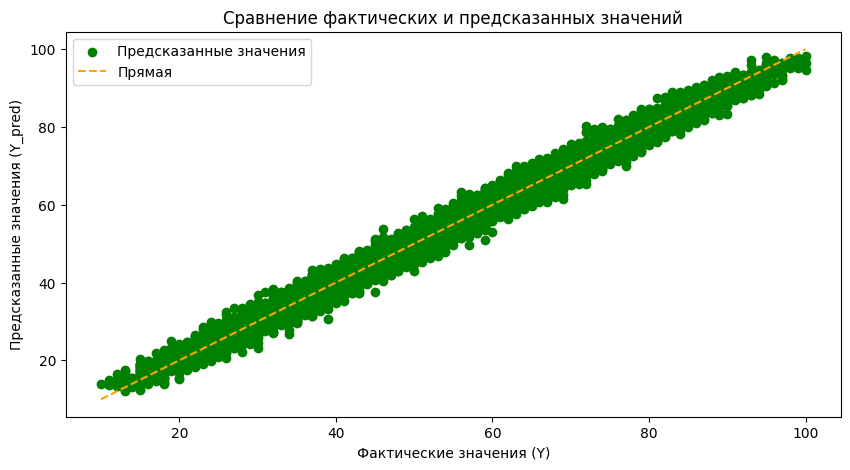

In [101]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Обучение модели линейной регрессии
lin_reg_model = LinearRegression()
lin_reg_model.fit(X, y)
predictions = lin_reg_model.predict(X)

# Вычисление метрик R² и MAPE
r_squared = r2_score(y, predictions)
mape_value = MAPE_func(y, predictions)

# Создание таблицы для сравнения результатов
cc_data = {
    'Params': ['Свободный член', 'К_1', 'K_2', 'K_3', 'К_4', 'R²', 'MAPE'],
    'Градиентный спуск': [
        np.round(lin_reg_model.intercept_, 4),  
        np.round(lin_reg_model.coef_[0, 1], 4),  
        np.round(lin_reg_model.coef_[0, 2], 4),  
        np.round(lin_reg_model.coef_[0, 3], 4),  
        np.round(lin_reg_model.coef_[0, 4], 4),
        np.round(r2_opt * 100, 4),       # R²
        np.round(mape_opt, 4)            # MAPE
    ],
    'Использование sklearn': [
        np.round(par[0], 4),             # Свободный член
        np.round(par[1], 4),             # Коэффициент 1
        np.round(par[2], 4),             # Коэффициент 2
        np.round(par[3], 4),             # Коэффициент 3
        np.round(par[4], 4),             # Коэффициент 4
        np.round(r_squared * 100, 4),    # R²
        np.round(mape_value, 4)          # MAPE
    ]
}

cc_df = pd.DataFrame(cc_data)

# Удаление квадратных скобок из строковых значений
cc_df['Градиентный спуск'] = cc_df['Градиентный спуск'].astype(str).str.replace('[', '').str.replace(']', '')
cc_df['Использование sklearn'] = cc_df['Использование sklearn'].astype(str).str.replace('[', '').str.replace(']', '')

# Вывод таблицы сравнения
print('Ручной расчет VS sklern')
print(cc_df)

plt.figure(figsize=(10, 5))
plt.scatter(y, predictions, color='green', label='Предсказанные значения') 
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', linestyle='--', label='Прямая')  
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения (Y)')
plt.ylabel('Предсказанные значения (Y_pred)')
plt.legend()
plt.show()


**Вывод. Решение вручную и решение библиотекой SKLEARN совпадают. Показатели модели говорят о  ее высокой точности. Наибольшее влияние на индекс успеваемости оказывают оценки за предыдущие экзамены, на втором месте - часы учебы. Наименьшее влияние на результат оказывает количество пробных экзаменационных работ, которое делал студент.**